#Predator-Prey Problem

We solve the predator-prey problem as a following differential equations using 4th order Runge-Kutta method:

\begin{equation}
  \frac{dx}{dt} = \alpha x - \beta xy \\
  \frac{dy}{dt} = \delta xy - \gamma y
\end{equation}

We assume that $\alpha = \gamma = 0.1$, $\beta = 0.02$, $\delta = 0.01$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x, y, a, b):
  return a*x - b*x*y

def g(x, y, c, d):
  return d*x*y - c*y

Implementing RK4 function as always.

In [3]:
def rk4(n, f, g, ti, tf, a, b, c, d):
  h = (tf - ti)/n
  x = np.zeros(n+1)
  y = np.zeros(n+1)
  t = np.linspace(ti, tf, n+1)

  x[0] = 40; y[0] = 9

  for i in range(n):
    k1 = h*f(x[i], y[i], a, b)
    l1 = h*g(x[i], y[i], c, d)

    k2 = h*f(x[i] + k1/2, y[i] + l1/2, a, b)
    l2 = h*g(x[i] + k1/2, y[i] + l1/2, c, d)

    k3 = h*f(x[i] + k2/2, y[i] + l2/2, a, b)
    l3 = h*g(x[i] + k2/2, y[i] + l2/2, c, d)

    k4 = h*f(x[i] + k3, y[i] + l3, a, b)
    l4 = h*g(x[i] + k3, y[i] + l3, c, d)

    x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    y[i+1] = y[i] + (l1 + 2*l2 + 2*l3 + l4)/6

  return t, x, y

In [4]:
a = 0.1; b = 0.02; c = 0.1; d = 0.01
ti = 0; tf = 300

t, X, Y = rk4(10000, f, g, ti, tf, a, b, c, d)

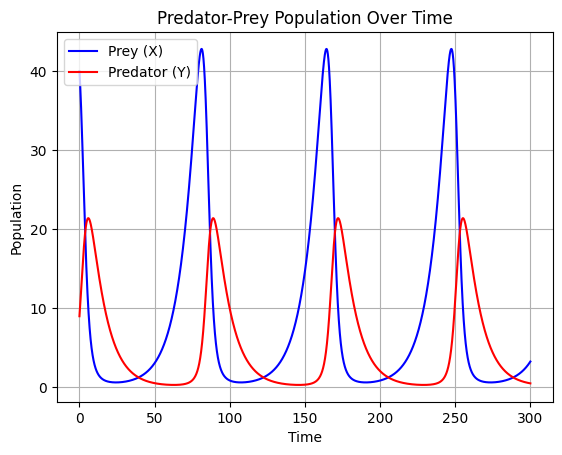

In [5]:
plt.plot(t, X, color='blue', label='Prey (X)')
plt.plot(t, Y, color='red', label='Predator (Y)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Population Over Time')
plt.grid()
plt.show()

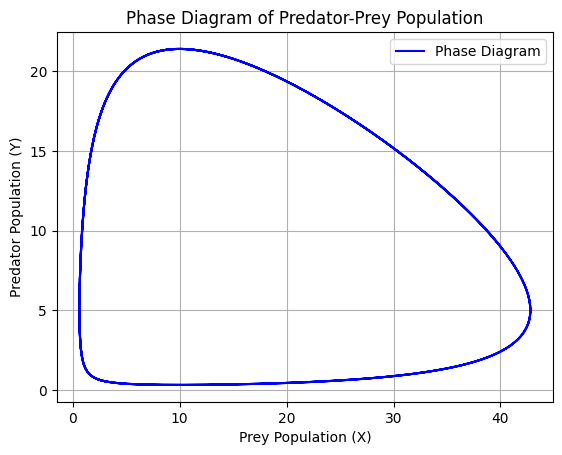

In [6]:
plt.plot(X, Y, label='Phase Diagram', color='blue')
plt.title('Phase Diagram of Predator-Prey Population')
plt.xlabel('Prey Population (X)')
plt.ylabel('Predator Population (Y)')
plt.legend()
plt.grid()
plt.show()